In [1]:
# import matplotlib.pyplot as plt
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


<h1>zad 0</h1>

In [2]:
a = np.arange(1, 101)
b = np.arange(1, 101, 2)
c = np.arange(-np.pi, 1.01*np.pi, 0.01*np.pi)
d = np.concatenate((np.arange(-np.pi, 0., 0.01*np.pi), np.arange(0.01*np.pi, 1.01*np.pi, 0.01*np.pi)))
e = np.sin(np.arange(1, 101))
e[e < 0.] = 0.

A = np.arange(1, 101).reshape(10, -1)
B = np.diag(np.arange(1, 101), k=0) \
    + np.diag(np.arange(99, 0, -1), k=1) \
    + np.diag(np.arange(99, 0, -1), k=-1)
C = np.triu(np.ones((10, 10)))
D = np.vstack((
    np.cumsum(np.arange(1,101), dtype='float64'),
    np.cumprod(np.arange(1, 101), dtype='float64'),
))
E = np.arange(1,101).reshape(1, 100) % np.arange(1,101).reshape(100, 1)
E[E > 0] = 1
E = 1 - E

<h1>zad 1</h1>

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
print 'Feature names: ', iris.feature_names
print 'Target names: ', iris.target_names
print 'Iris data size: {}x{}'.format(iris.data.shape[0], iris.data.shape[1])

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']
Iris data size: 150x4


(2.0, 4.5)

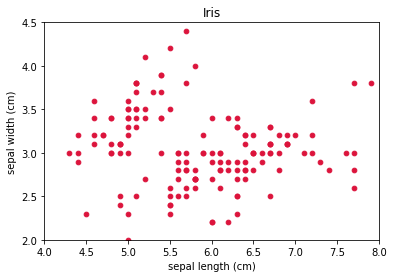

In [5]:
scatter(iris.data[:,0], iris.data[:,1], color='crimson', marker='o', s=22)

title('Iris')
xlabel(iris.feature_names[0])
ylabel(iris.feature_names[1])

xlim(4., 8.)
ylim(2., 4.5)

(1.0, 5.0)

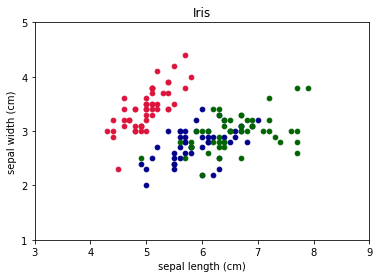

In [6]:
colors = ['crimson', 'darkblue', 'darkgreen']
for target in set(iris.target):
    target_mask = iris.target==target
    scatter(
        iris.data[target_mask,0], 
        iris.data[target_mask,1],
        color=colors[target], 
        marker='o', 
        s=22
    )

title('Iris')
xlabel(iris.feature_names[0])
ylabel(iris.feature_names[1])

xticks(range(3,10))
yticks(range(1,6))

xlim(3., 9.)
ylim(1., 5.)

In [7]:
savefig('zadanie1.png')

<h1>zad2</h1>

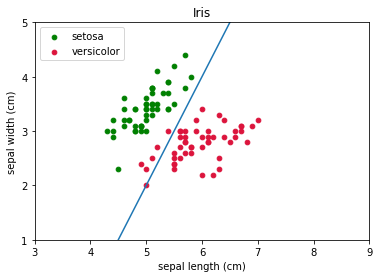

In [8]:
colors = ['green', 'crimson']
for target in [0,1]:
    target_mask = iris.target==target
    scatter(
        iris.data[target_mask,0], 
        iris.data[target_mask,1],
        color=colors[target], 
        marker='o', 
        s=22,
        label=iris.target_names[target],
    )
X = np.linspace(3., 9., 2)
plot(X, 2*X - 8.)
title('Iris')
xlabel(iris.feature_names[0])
ylabel(iris.feature_names[1])

xticks(range(3,10))
yticks(range(1,6))

xlim(3., 9.)
ylim(1., 5.)
legend(loc='upper left')

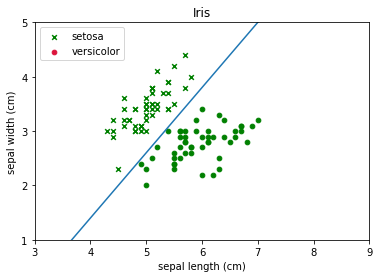

In [9]:
def f(X, a=2., b=-8.):
    return a*X + b

a = 1.2
b = -3.4

colors = [['green', 'crimson'], ['crimson', 'green']]
markers = ['x', 'o']
for target in [0,1]:
    target_mask = iris.target==target
    X = iris.data[target_mask, 0]
    Y = iris.data[target_mask, 1]
    line_mask = Y > f(X, a, b)
    
    scatter(
        X[line_mask], 
        Y[line_mask], 
        color=colors[target][0], 
        marker=markers[target], 
        label=iris.target_names[target],
        s=22
    )
    
    scatter(
        X[~line_mask], 
        Y[~line_mask], 
        color=colors[target][1], 
        marker=markers[target], 
        s=22,
    )
    

X = np.linspace(3., 9., 2)
plot(X, f(X, a, b))
title('Iris')
xlabel(iris.feature_names[0])
ylabel(iris.feature_names[1])

xticks(range(3,10))
yticks(range(1,6))

xlim(3., 9.)
ylim(1., 5.)
legend(loc='upper left')

In [104]:
savefig('zadanie2.png')

<h1>zad3</h1>

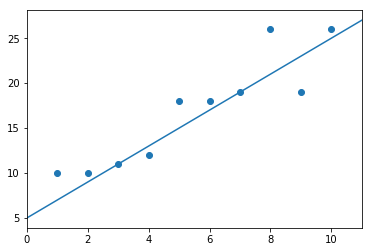

In [10]:
def f(X, a=2., b=5.):
    return a*X + b

points = np.array([(1, 10), (2, 10),(3, 11), (4, 12), (5, 18), (6, 18), (7, 19), (8, 26), (9, 19), (10, 26)])
scatter(points[:,0], points[:,1])

xlim(0., 11.)
X = np.linspace(0., 11., 2)
plot(X, f(X))

In [11]:
savefig('zadanie3a.png')

In [12]:
X = points[:,0]
Y = points[:,1]
Y1 = f(X)

print 'Distances: ', Y-Y1
print 'Sum of Distances: ', np.sum(abs(Y-Y1))

Distances:  [ 3.  1.  0. -1.  3.  1.  0.  5. -4.  1.]
Sum of Distances:  19.0


In [13]:
M = np.vstack((X, np.ones((1,X.shape[0]))))
a,b = (Y.dot(M.T)).dot(np.linalg.inv(M.dot(M.T)))

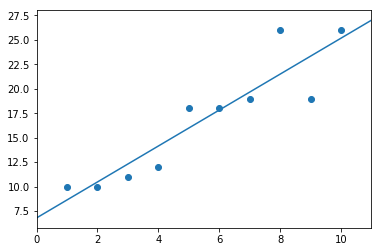

In [14]:
points = np.array([(1, 10), (2, 10),(3, 11), (4, 12), (5, 18), (6, 18), (7, 19), (8, 26), (9, 19), (10, 26)])
scatter(points[:,0], points[:,1])

xlim(0., 11.)
X = np.linspace(0., 11., 2)
plot(X, f(X, a, b))

In [15]:
savefig('zadanie3b.png')

In [16]:
X = points[:,0]
Y = points[:,1]
Y1 = f(X, a, b)

print 'Distances: ', Y-Y1
print 'Sum of Distances: ', np.sum(abs(Y-Y1))

Distances:  [ 1.36363636 -0.47272727 -1.30909091 -2.14545455  2.01818182  0.18181818
 -0.65454545  4.50909091 -4.32727273  0.83636364]
Sum of Distances:  17.8181818182


<h1>zad4</h1>

In [17]:
def generate_polygon(n, d):
    theta = np.pi - (np.pi*(n-2))/n
    rot_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)],
    ])
    res = []
    curr_vec = np.array([[d], [0.]])
    for _ in xrange(n):
        res.append(curr_vec.copy().ravel())
        curr_vec = rot_matrix.dot(curr_vec)
        
    
    return np.array(res)
        

def plot_data(K, d, ax):
    centers = generate_polygon(K, d)
    for center in centers:
        X = np.random.normal(loc=center[0], scale=1., size=1000)
        Y = np.random.normal(loc=center[1], scale=1., size=1000)
        ax.scatter(X, Y, s=5)
    

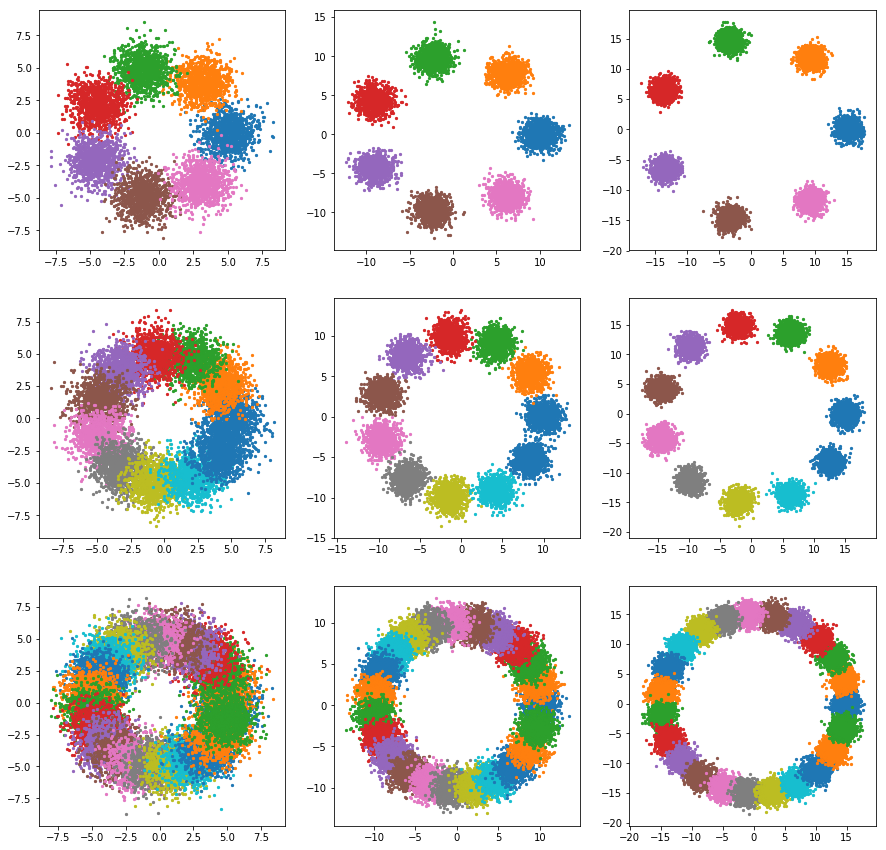

In [18]:
f, ax = subplots(3, 3, figsize=(15,15))
for i, K in enumerate([7, 11, 23]):
    for j,d in enumerate([5, 10, 15]):
        plot_data(K, d, ax[i][j])

<h1>zad5</h1>

In [19]:
def dist(X, c):
    d = X - c.reshape((2,1))
    d = (d**2).sum(axis=0)
    return d

def plot_data_rg(K, d, ax):
    centers = generate_polygon(K, d)
    for i,center in enumerate(centers):
        cx, cy = center
        c_prev = centers[i-1]
        c_next = centers[(i+1)%centers.shape[0]]
        
        data = np.vstack((
            np.random.normal(loc=cx, scale=1., size=1000),
            np.random.normal(loc=cy, scale=1., size=1000),
        ))
        
        curr_dist = dist(data, center)
        prev_dist = dist(data, c_prev)
        next_dist = dist(data, c_next)
        
        mask_red = (prev_dist < curr_dist)|(next_dist < curr_dist)
        ax.scatter(data[0,mask_red], data[1,mask_red], s=1, marker='p', color='r')
        
        ax.scatter(data[0,~mask_red], data[1,~mask_red], s=1, marker='p', color='g')

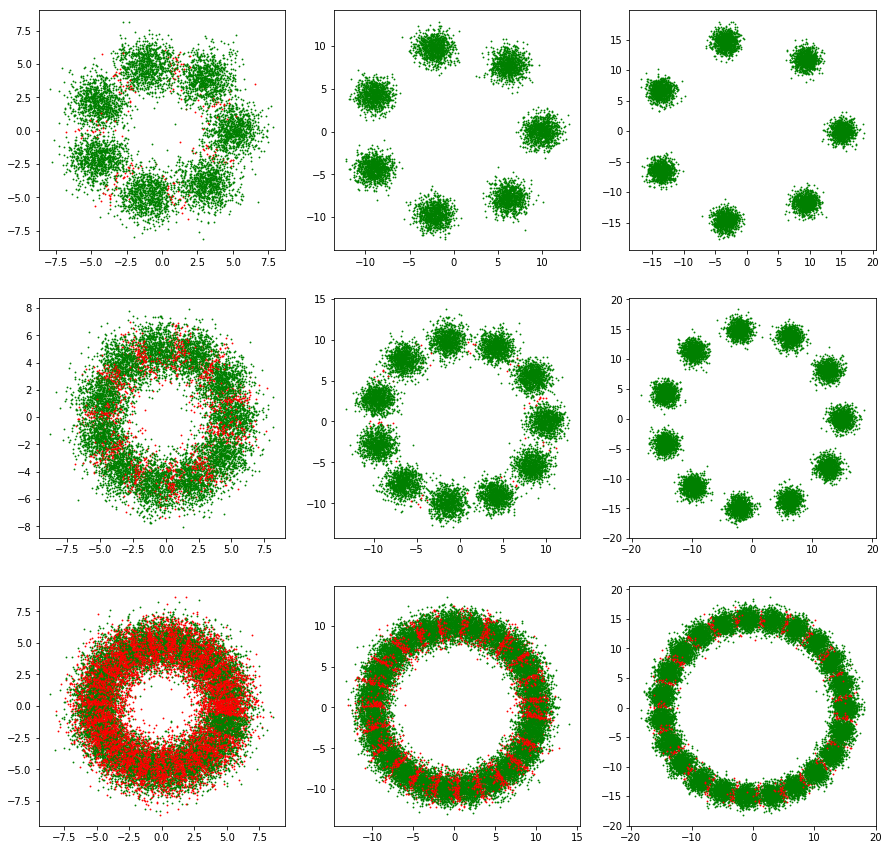

In [20]:
f, ax = subplots(3, 3, figsize=(15,15))
for i, K in enumerate([7, 11, 23]):
    for j,d in enumerate([5, 10, 15]):
        plot_data_rg(K, d, ax[i][j])